In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
df= pd.read_csv("/content/sales_data.csv")
df.head(20)


In [8]:
df.shape

(2000, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sale_id           2000 non-null   int64 
 1   sale_date         2000 non-null   object
 2   product_category  2000 non-null   object
 3   revenue           2000 non-null   int64 
 4   profit            2000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 78.3+ KB


In [11]:
df.describe()

,sale_id,revenue,profit
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,560.987500,159.957500
std,577.494589,261.173611,81.826857
min,1.000000,100.000000,20.000000
25%,500.750000,337.000000,86.000000
50%,1000.500000,580.500000,161.000000
75%,1500.250000,784.250000,230.000000
max,2000.000000,1000.000000,300.000000


In [12]:
df.isnull().sum()

,0
sale_id,0
sale_date,0
product_category,0
revenue,0
profit,0


In [13]:
df.drop_duplicates()

,sale_id,sale_date,product_category,revenue,profit
0,1,2023-04-07,Toys,519,143
1,2,2024-02-07,Electronics,335,291
2,3,2024-03-05,Electronics,274,48
3,4,2024-07-10,Toys,791,108
4,5,2023-06-09,Electronics,762,193
...,...,...,...,...,...
1995,1996,2024-11-23,Sports,495,22
1996,1997,2024-02-25,Home,328,70
1997,1998,2024-08-29,Grocery,514,144
1998,1999,2024-05-31,Home,205,205


In [15]:
total_revenue=df["revenue"].sum()
total_revenue

1121975

In [18]:
sales_category= df.groupby('product_category')["revenue"].sum().sort_values(ascending=False)
sales_category

,revenue
product_category,
Fashion,199141
Toys,197943
Sports,186668
Electronics,180523
Home,179303
Grocery,178397


In [20]:
df['sale_date']=pd.to_datetime(df['sale_date'])

In [21]:
df['month']= df['sale_date'].dt.month

In [22]:
monthly_sales= df.groupby('month')["revenue"].sum().sort_values(ascending=False)
monthly_sales

,revenue
month,
4,106126
10,104162
7,100170
3,98200
9,97525
2,91109
8,90646
11,90588
1,90105


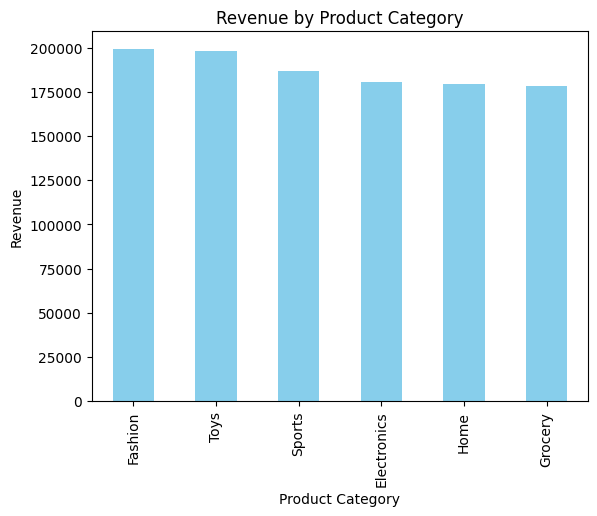

In [24]:
sales_category.plot(kind='bar',color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.show()

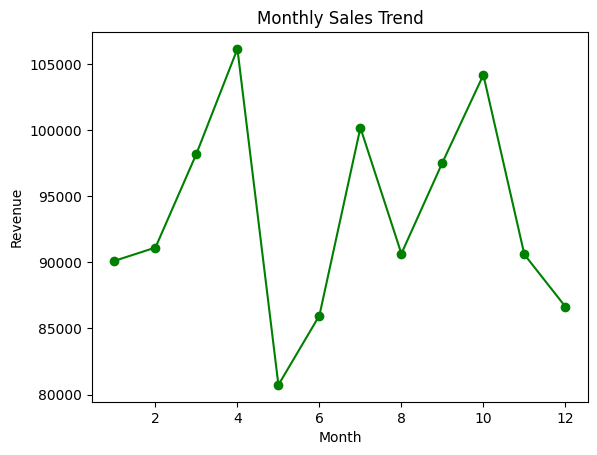

In [25]:
monthly_sales.sort_index().plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()